<a href="https://colab.research.google.com/github/YasuharuSuzuki/24_programing2/blob/main/" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 機械学習に関する問題

## 用語の理解を問う問題
- 以下の問題について、正解となる選択肢を出力してください

### 問題16 (3点)
次のうち、回帰モデルの特徴として最も適切なものを選べ
   1. カテゴリーを予測する
   2. 連続的な数値を予測する
   3. データをグループ分けする
   4. パターンを認識する

In [1]:
# 正解を出力してください
print('2') # 回帰モデルは、入力データに基づいて連続的な数値を予測するために使用されます。

2


### 問題17 (3点)
予測値と実際の値の二乗誤差の平均を取り、さらに平方根を取った指標は何と呼ばれますか？
   1. 平均絶対誤差（MAE）
   2. 平均二乗誤差（MSE）
   3. 二乗平均平方根誤差（RMSE）
   4. R-squared（決定係数）

In [2]:
# 正解を出力してください
print('3')  # 二乗平均平方根誤差（RMSE）は、予測値と実際の値の差の二乗の平均を取り、さらに平方根を取った指標です。

3


### 問題18 (3点)
次のうち、分類問題の例として最も適切なものを選べ
   1. 住宅価格の予測
   2. 株価の予測
   3. 顧客の購買量の予測
   4. 顧客が商品を購入するかどうかの予測

In [3]:
# 正解を出力してください
print('4')  # これは二値分類の例で、結果は「購入する」または「購入しない」というカテゴリーになります。

4


## プログラムを書く問題
- penguinのデータセットを使って、モデルの作成、評価を行ってください。

### Penguinのデータセット
- ペンギンの生息地、くちばしの大きさ等から、種別を推測するデータセットです。
- `data/penguins.csv` のデータを読み込んで処理して行きましょう。
- 各列の名称と内容は以下の通りです。([Githubの情報](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#about-the-data)から抜粋)

| Variable | Definition | Key |
| --- | --- | --- | 
| species | penguin species | [Chinstrap, Adélie, or Gentoo](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#meet-the-palmer-penguins) |
| island | island name in the Palmer Archipelago (Antarctica) | Dream, Torgersen, or Biscoe |
| bill_length_mm | [the culmen(bill) length (mm)](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#bill-dimensions) |  |
| bill_depth_mm | [the culmen(bill) depth (mm)](https://github.com/allisonhorst/palmerpenguins?tab=readme-ov-file#bill-dimensions) |
| flipper_length_mm | flipper length (mm) | |
| body_mass_g | body mass (g) |
| sex | penguin sex | |


### 問題19 モデルの作成 (9点)
- データセットを読み込み、欠損値の処理やカテゴリカル変数の対策を行って、モデルを作成してみましょう
  - データセットの読み込み（02pandas.ipynbと同じプログラムで大丈夫です）
  - 欠損値の対策（02pandas.ipynbと同じプログラムで大丈夫です）
  - カテゴリカル変数の対策
  - 説明変数と目的変数に分ける
  - モデルを学習する（学習に使用するモデルは何でも良いです。例：SVC、RandomForestClassifierなど）

In [4]:
# ライブラリのimport
import pandas as pd # pandasモジュールを読み込む（データ分析ライブラリ）
import numpy as np # NumPyモジュールを読み込む（数値演算ライブラリ）
import matplotlib.pyplot as plt # 可視化ライブラリ
import seaborn as sns # Seabornモジュールを読み込む（可視化ライブラリ。pairplotなど多くのデータ分析情報をplotするのに向いている）

from sklearn.preprocessing import LabelEncoder # 文字データを数字に置換するクラス（後述）
from sklearn.model_selection import train_test_split # scikit-learnの訓練データ / テストデータ 分割関数
from sklearn import metrics # scikit-learnの精度算出用ライブラリ
from sklearn import svm # scikit-learnのSVM(サポートベクターマシン)
from sklearn.ensemble import RandomForestClassifier # scikit-learnのRandomForest(ランダムフォレスト)

from mpl_toolkits.axes_grid1 import Divider, Size # matplotlib 領域修正用クラス
from mpl_toolkits.axes_grid1.mpl_axes import Axes # matplotlib 領域修正用クラス

In [ ]:
# drive.mount()を使用してGoogleDriveをMount
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# os.chdir()を使用してカレントディレクトリを変更。作成したショーットカット名を使ってパスを指定します。
import os
os.chdir('/content/drive/MyDrive/＜作成したショートカット名＞')

In [6]:
# データファイルパス定義
PENGUIN_CSV = "./data/penguins.csv"

In [7]:
# read_csvを使ってcsvを読み込みます
df_penguin = pd.read_csv(PENGUIN_CSV, index_col=None) # ペンギンデータセットにはindexが無いため、Noneで読み込みます
df_penguin.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [8]:
# 欠損値対策1
# SexがNoneの個体に'Unkown'を入れておく
df_penguin2 = df_penguin.copy()
df_penguin2['sex'] = df_penguin2['sex'].fillna('Unkown')

# 欠損値対策2
# bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g にもわずかですが欠損値が見られたため、削除しておきます
df_penguin2 = df_penguin2.dropna(how='any')  # how='any'は全ての列のうちどれか１つでも欠損値を含む行を対象とすることを指定しています

In [9]:
# 欠損値が無くなったことを確認しましょう
df_penguin2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            342 non-null    object 
 1   island             342 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                342 non-null    object 
dtypes: float64(4), object(3)
memory usage: 21.4+ KB


In [10]:
# カテゴリカル変数の対策
categories = ['species','island','sex']  # カテゴリカル変数の対象とする列を指定する

df_penguin3 = df_penguin2.copy()  # DataFrameを書き換えるため、変換する
for category in categories:
    label_encoder = LabelEncoder()  # 文字列を数値に変換するクラスのインスタンスを作成
    label_encoder = label_encoder.fit(df_penguin3[category])  # fit関数で文字列と数値の関係を取得
    df_penguin3[category] = label_encoder.transform(df_penguin3[category])  # transformで変換を実行
    df_penguin3[category] = df_penguin3[category].astype('category') # カテゴリカル変数には専用の型'category'があるため、型変換しておく
    print(df_penguin3[category].value_counts())  # 変換後の値を表示

species
0    151
2    123
1     68
Name: count, dtype: int64
island
0    167
1    124
2     51
Name: count, dtype: int64
sex
1    168
0    165
2      9
Name: count, dtype: int64


In [12]:
# 説明変数と目的変数に分ける
X = df_penguin3.iloc[:,1:]
y = df_penguin3.iloc[:,0]

In [13]:
# 訓練データとテストデータに分割する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)  # stratifyを指定すると層別にきれいに分けることができます

In [14]:
# 学習する
svc_model = svm.SVC()    # モデルを作る
svc_model.fit(X_train, y_train)    # 訓練する

SVC()

### 問題20 モデルの評価 (12点)
- 以下のいずれかの評価を少なくとも２つ行って、それぞれに最低１つの簡単な考察をつけてみましょう
  - 正答率と誤った個数を算出する
  - classification reportを作成する
  - 混合行列(confusion matrix)を表示する
  - FeatureImportanceを表示する(決定木系のモデルでしか使用できません)

In [15]:
# 正答率と誤った個数を算出する
accuracy = svc_model.score(X_test, y_test)    # 正答率を調べる
print(f"正答率 = {accuracy}")

predicted = svc_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.7864077669902912
誤った個数：22


- 約8割近く当てられたので、初手としては悪くないのではないでしょうか
- 不均衡データなので、偏って当てに行くモデルになっている可能性はありそうです

In [16]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


/mnt/d/user/yasubei/project/okikokudai/24年度/03プログラミングII(2024前期)/90リポジトリ/24_programing2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/d/user/yasubei/project/okikokudai/24年度/03プログラミングII(2024前期)/90リポジトリ/24_programing2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/mnt/d/user/yasubei/project/okikokudai/24年度/03プログラミングII(2024前期)/90リポジトリ/24_programing2/.venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is il

,precision,recall,f1-score,support
0,0.703125,1.000000,0.825688,45.000000
1,0.000000,0.000000,0.000000,21.000000
2,0.923077,0.972973,0.947368,37.000000
accuracy,0.786408,0.786408,0.786408,0.786408
macro avg,0.542067,0.657658,0.591019,103.000000
weighted avg,0.638781,0.786408,0.701054,103.000000


- 1が全く当てられていませんね

In [17]:
result_labels = ['Adelie','Chinstrap','Gentoo']
result_labels

['Adelie', 'Chinstrap', 'Gentoo']

confusion matrix


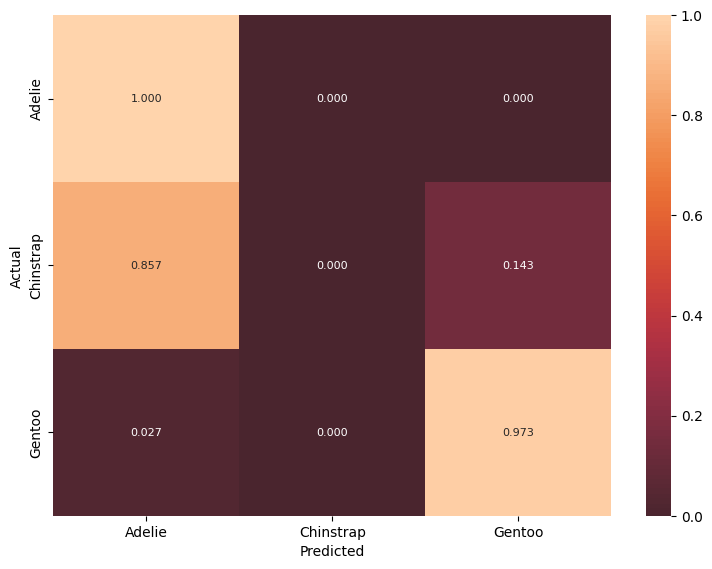

In [18]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- ChinstrapをAdelieと予想してしまっているケースが多いですね

---
---

### RandomForestでの学習例

In [19]:
# RandomForestで学習させる
rf_model = RandomForestClassifier(max_depth=5)    # max_depth のパラメータを指定する
rf_model.fit(X_train, y_train)     # 訓練データと教師データで学習する

RandomForestClassifier(max_depth=5)

In [20]:
# モデルの学習結果を評価する
accuracy = rf_model.score(X_test, y_test)    # テストデータで試す
print(f"正答率 = {accuracy}")

predicted = rf_model.predict(X_test)    # テストデータの分類結果
n_error = (y_test != predicted).sum()    # 正解と分類結果を比較する
print(f"誤った個数：{n_error}")

正答率 = 0.9902912621359223
誤った個数：1


- かなり正答率あがりましたね

In [21]:
# 分類レポート
print("classification report")
report = metrics.classification_report(y_test, predicted, output_dict=True)
pd.DataFrame(report).T

classification report


,precision,recall,f1-score,support
0,1.000000,0.977778,0.988764,45.000000
1,0.954545,1.000000,0.976744,21.000000
2,1.000000,1.000000,1.000000,37.000000
accuracy,0.990291,0.990291,0.990291,0.990291
macro avg,0.984848,0.992593,0.988503,103.000000
weighted avg,0.990733,0.990291,0.990350,103.000000


- 生存時のrecallがかなり改善されています
- macro avgもかなり上がっていますね

confusion matrix


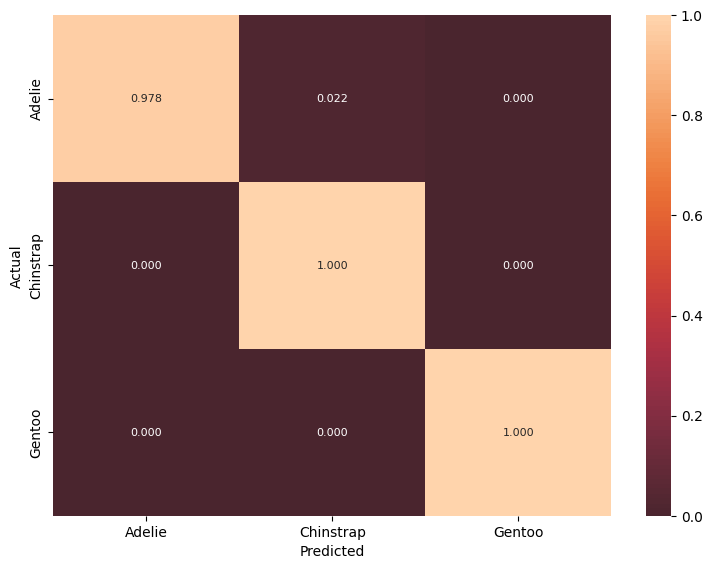

In [22]:
# 混合行列
print("confusion matrix")
cm = metrics.confusion_matrix(y_test, predicted)

# 割合で表示したいので値を変換する
cm2 = cm.copy().astype(np.float64)
for y_index in range(len(cm2)):
    cm2[y_index] = (cm2[y_index] / cm2[y_index].sum())

plt.subplots(figsize=(9, 6.5)) # 図の大きさを指定
heatmap = sns.heatmap(cm2, vmin=0, vmax=1, center=-0.25, annot=True, fmt=".3f",  annot_kws={"size":8},
                     xticklabels=result_labels, yticklabels=result_labels) # seabornで可視化する
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

- ChinstrapをAdelieと予想してしまっているケースが全く無くなりました

In [23]:
def _convert_column_name_for_feature_importance(columns):
    new_columns = []
    for name_src in columns:
        new_columns.append(name_src)

    return new_columns

# figureをmargin付きで作成する
def _make_figure_with_margin(ax_w_px=400, ax_h_px=300, ax_margin_px = (50, 50, 50, 50), fig_dpi=100):

    # サイズ指定のための処理 ↓↓ ここから ↓↓ 
    ax_w_inch = ax_w_px / fig_dpi
    ax_h_inch = ax_h_px / fig_dpi
    ax_margin_inch = (ax_margin_px[0] / fig_dpi,
                      ax_margin_px[1] / fig_dpi,
                      ax_margin_px[2] / fig_dpi,
                      ax_margin_px[3] / fig_dpi)  # Left,Top,Right,Bottom [inch]

    fig_w_inch = ax_w_inch + ax_margin_inch[0] + ax_margin_inch[2] 
    fig_h_inch = ax_h_inch + ax_margin_inch[1] + ax_margin_inch[3]

    fig = plt.figure(dpi=fig_dpi, figsize=(fig_w_inch, fig_h_inch))
    ax_p_w = [Size.Fixed(ax_margin_inch[0]),Size.Fixed(ax_w_inch)]
    ax_p_h = [Size.Fixed(ax_margin_inch[1]),Size.Fixed(ax_h_inch)]
    divider = Divider(fig, (0.0, 0.0, 1.0, 1.0), ax_p_w, ax_p_h, aspect=False)
    ax = Axes(fig, divider.get_position())
    ax.set_axes_locator(divider.new_locator(nx=1,ny=1))
    fig.add_axes(ax)
    return fig, ax

# FeatureImportanceをplotする
def _plot_feature_importances(x_column_names, best_estimator):
    importances = pd.DataFrame(
        {"features": _convert_column_name_for_feature_importance(x_column_names),
         "importances": best_estimator.feature_importances_})

    importances = importances[importances['importances'] != 0] # 重要度ゼロのものは表示しない
    importances.sort_values(by="importances", inplace=True, ignore_index=True, ascending=True)
    
    fig, ax = _make_figure_with_margin(800, 100+50*len(importances), ax_margin_px = (150, 50, 50, 50))
    plt.barh(importances['features'], importances['importances'])
    plt.title("Feature Importances (Zero variables are hidden)", fontsize=14)
    plt.show()

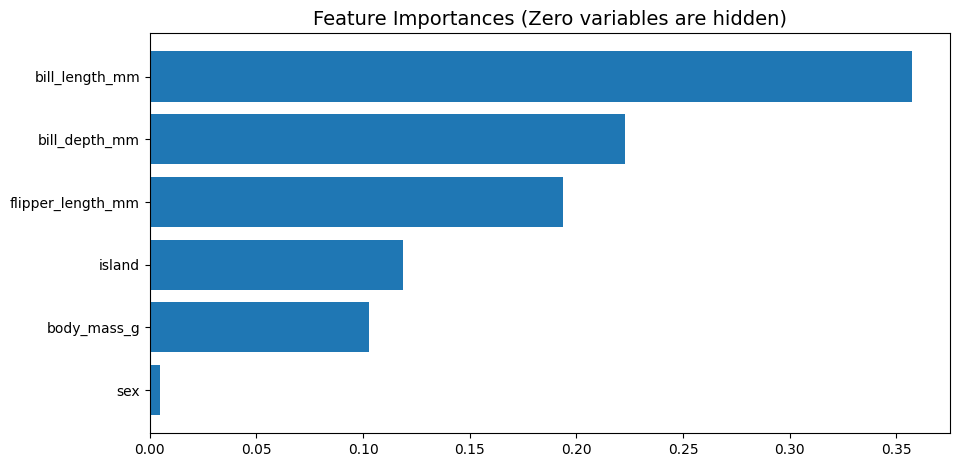

In [24]:
_plot_feature_importances(X_train.columns, rf_model)

- bill_length, bill_depth が高いですね
- islandもGento種を完全に当てられるので納得の高さ
- sexはもう少し重要度が高くても良さそうですが、今のところは'Unknown'値を入れてしまっているので、その影響もありそうです

---
---
---
---
---